# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [4]:
insurance_df = pd.read_csv('insurance.csv')

In [5]:
# testing pandas_profiling
import pandas_profiling
profile = insurance_df.profile_report(title='Insurance Data Analysis')
profile.to_file("insurance_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 373.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **How many unique regions do we have in the insurance_df DataFrame?**

In [5]:
unique_regions = insurance_df["region"].unique()
[print(region) for region in unique_regions]

southwest
southeast
northwest
northeast


[None, None, None, None]

In [6]:
unique_region_count = len(insurance_df["region"].unique())
unique_region_count

4

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS 

In [7]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [8]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# any null data? Nope | We can also calculate this from the Non-Null count in df.info()
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean(numeric_only=True) #ensure we're calculating the mean of numeric values only
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [13]:
df_age = insurance_df.groupby(by='age').mean(numeric_only=True)
df_age.head()

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802


In [14]:
# dir(df_age)

In [15]:
df_age_sorted = df_age.sort_values(by='charges', ascending=True)
df_age_sorted.head()

,bmi,children,charges
age,,,
21,28.185714,0.785714,4730.464330
26,29.428929,1.071429,6133.825309
18,31.326159,0.449275,7086.217556
38,28.996600,1.480000,8102.733674
28,29.482143,1.285714,9069.187564


In [16]:
df_age_sorted.index

Index([21, 26, 18, 38, 28, 32, 41, 19, 25, 22, 20, 31, 29, 24, 35, 34, 40, 39,
       27, 36, 33, 23, 49, 30, 42, 58, 46, 48, 45, 56, 50, 51, 44, 53, 55, 57,
       47, 37, 52, 54, 59, 62, 43, 63, 60, 61, 64],
      dtype='int64', name='age')

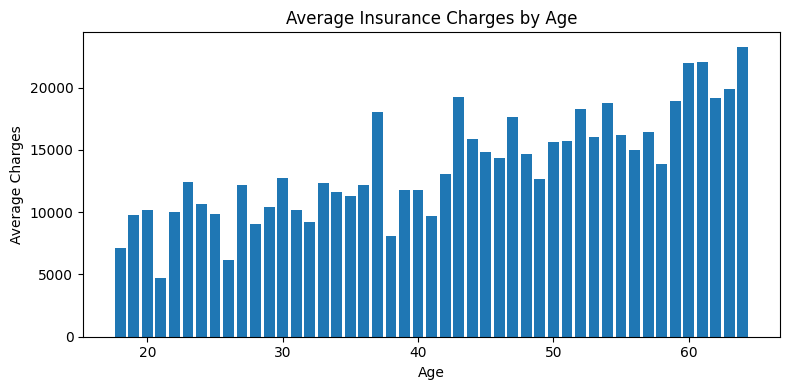

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(df_age_sorted.index, df_age_sorted['charges'])
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Age')
plt.tight_layout()
plt.show()

# CODING TASK #3: PERFORM DATA VISUALIZATION

<Axes: >

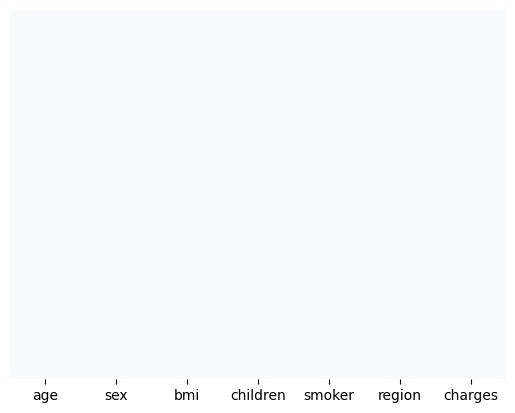

In [18]:
# check if there are any Null values - isNull visualisation
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [19]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

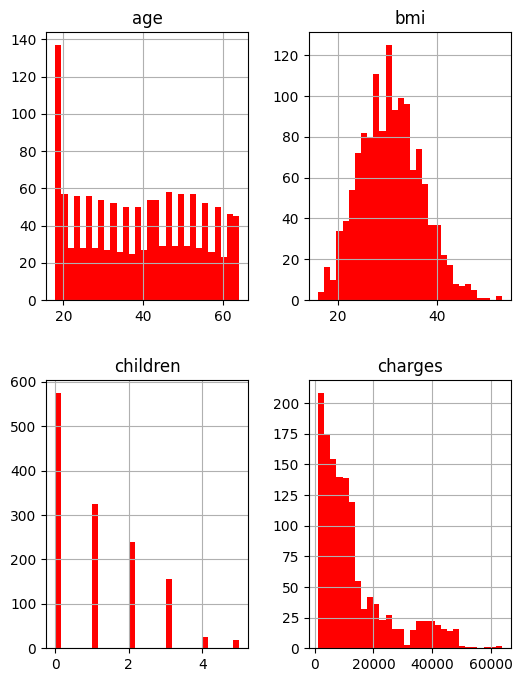

In [20]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (6, 8), color = 'r');


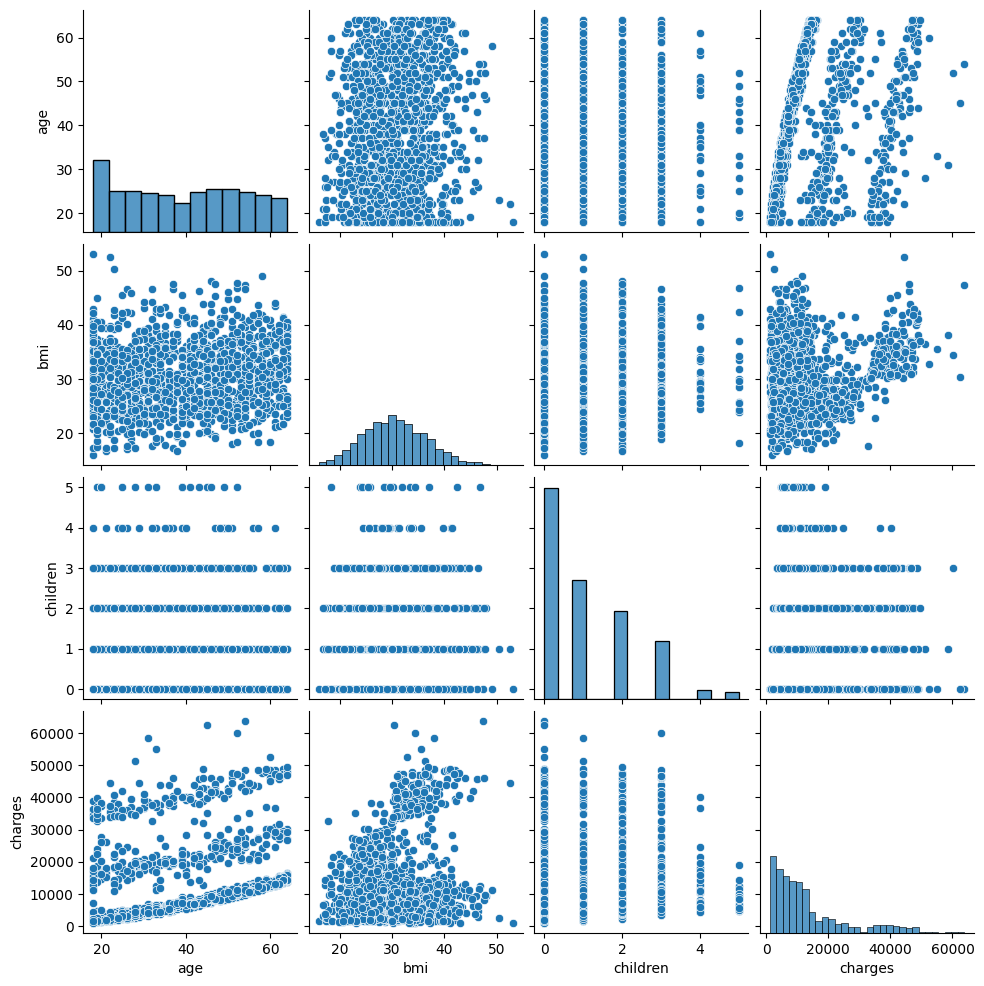

In [21]:
# plot pairplot - relationships between features 
sns.pairplot(insurance_df)

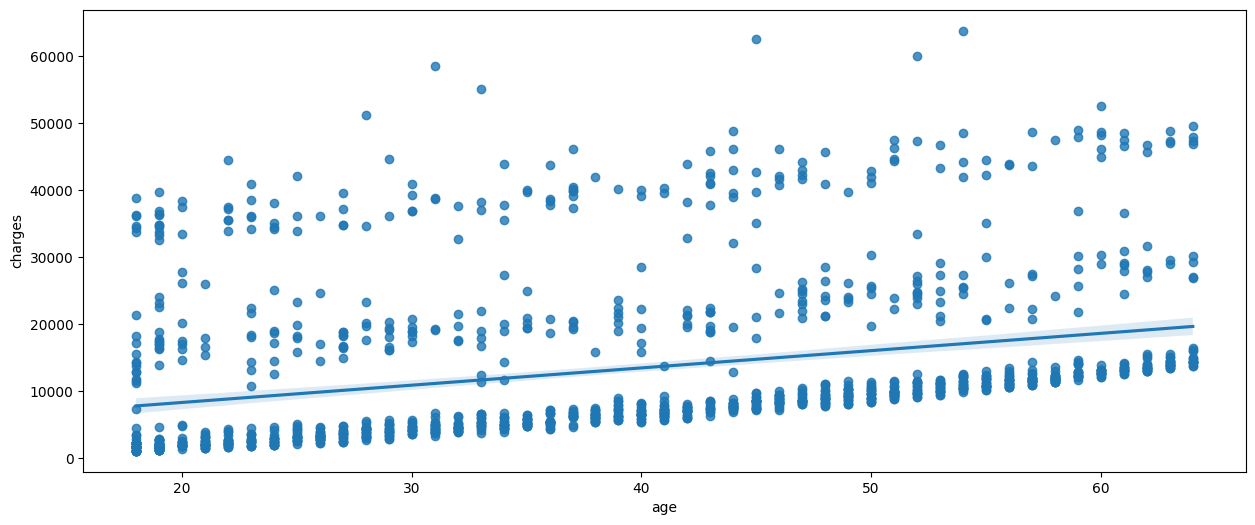

In [22]:
# quick regression / analysis of the relationship between the 'age' and the 'charges' 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

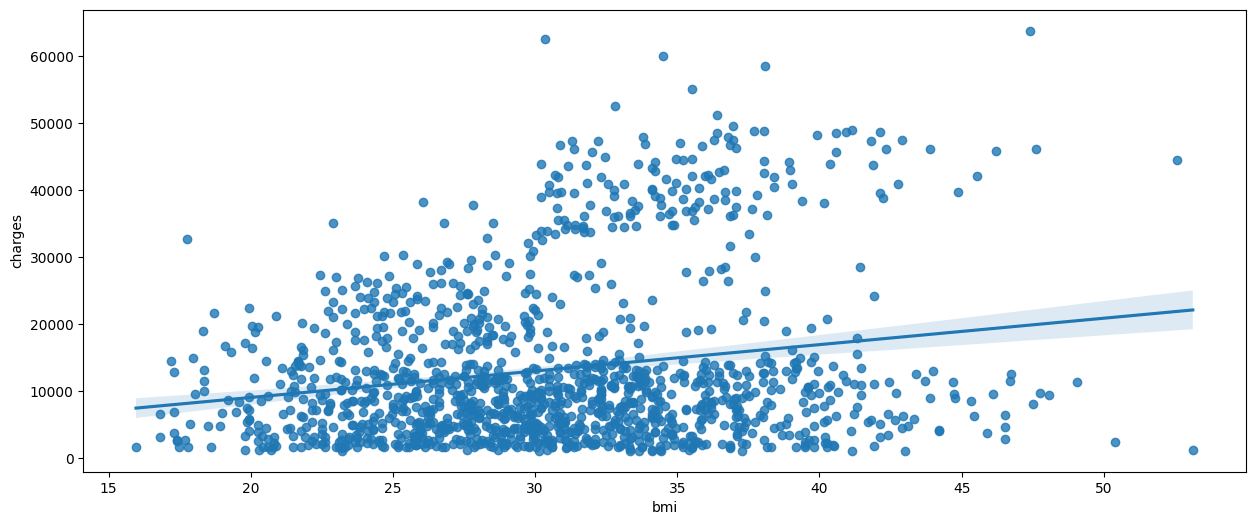

In [23]:

# quick regression / analysis of the relationship between the 'bmi' and the 'charges' 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [24]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
labels = ["sex","smoker","region"]
categorical_features = insurance_df[labels]
categorical_features

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [26]:
from sklearn.preprocessing import OneHotEncoder

categorical_features.columns = categorical_features.columns.astype(str)
ohe = OneHotEncoder()
categorical_encoded = ohe.fit_transform(categorical_features)

# Create a DataFrame from the sparse matrix
categorical_columns = pd.DataFrame(
    categorical_encoded.toarray(),
    columns=ohe.get_feature_names_out(input_features=categorical_features.columns)
)

In [27]:
categorical_columns.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
encoded_insurance_df = pd.concat([categorical_columns, insurance_df], axis =1)

In [29]:
encoded_insurance_df
insurance_ohe_df = encoded_insurance_df.drop(["sex","smoker","region"], axis = "columns")

<Axes: >

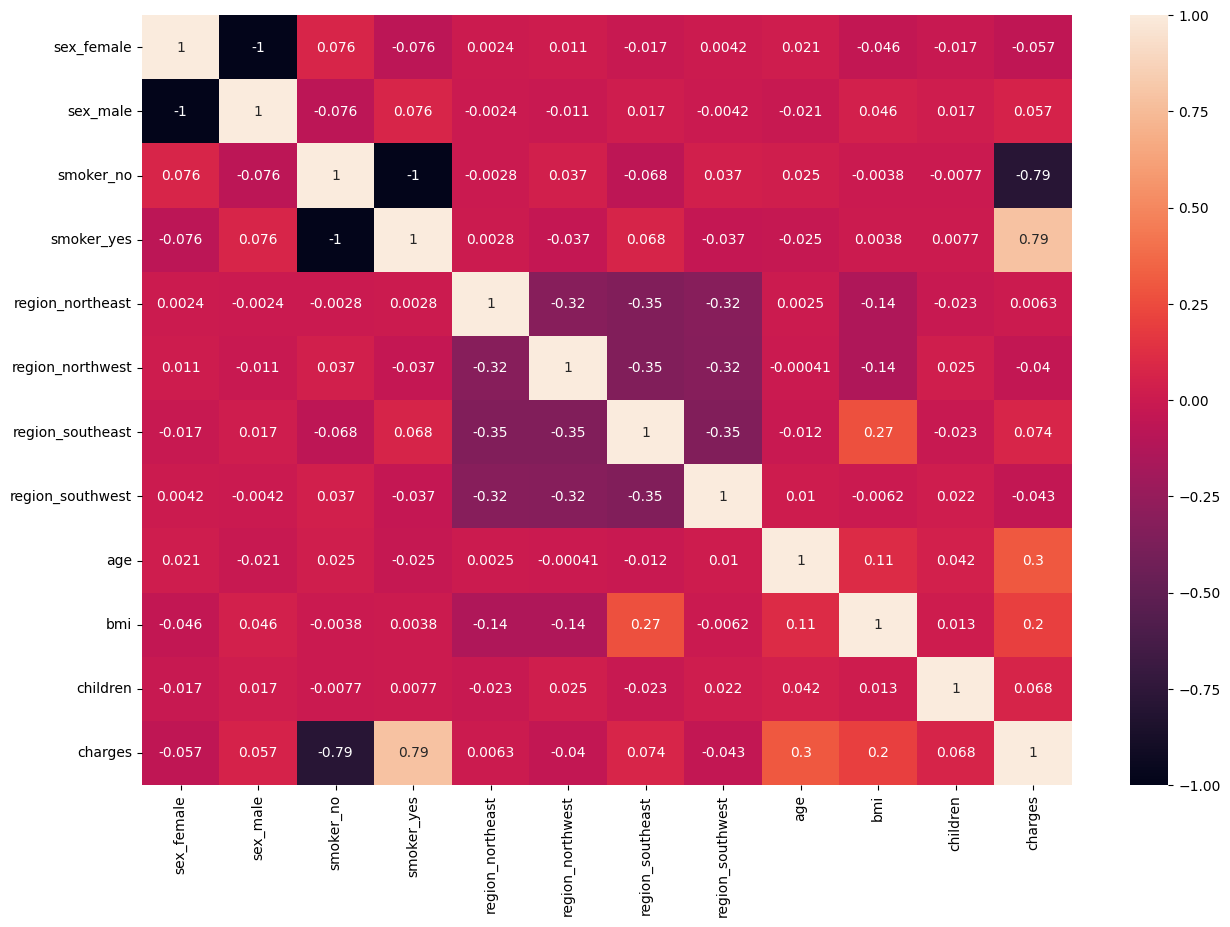

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(insurance_ohe_df.corr(), annot= True)

# CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [31]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_ohe_df, test_size=0.2, random_state=0)
# https://stackoverflow.com/a/59859477 - re. Random State
# Notice no y_test, y_train | Inputs and outputs will be in one pd dataframe -> 
# Entire pandas Df is passed on as training data, charges to be used as output 


In [32]:
X_train

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
621,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,37,34.100,4,40182.24600
194,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,34.430,0,1137.46970
240,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,23,36.670,2,38511.62830
1168,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,32,35.200,2,4670.64000
1192,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,58,32.395,1,13019.16105
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,27,26.030,0,3070.80870
835,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,42,35.970,2,7160.33030
1216,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,40,25.080,0,5415.66120
559,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,19,35.530,0,1646.42970


In [33]:
# test = remaining 20% of the data (268 rows)
X_test 

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
578,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,52,30.200,1,9724.53000
610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,47,29.370,1,8547.69130
569,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,48,40.565,2,45702.02235
1034,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,61,38.380,0,12950.07120
198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51,18.050,0,9644.25250
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,62,30.495,2,15019.76005
726,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41,28.405,1,6664.68595
1132,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,57,40.280,0,20709.02034
725,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,39.050,3,40932.42950


In [34]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

# https://auto.gluon.ai/stable/api/autogluon.tabular.models.html

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250415_125636"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          14
Memory Avail:       9.37 GB / 24.00 GB (39.0%)
Disk Space Avail:   787.60 GB / 926.35 GB (85.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num

(_ray_fit pid=62410) [1000]	valid_set's l2: 1.55249e+07	valid_set's r2: 0.866069


(_dystack pid=62259) Fitting model: WeightedEnsemble_L2 ... Training model for up to 48.51s of the 15.10s of remaining time.
(_dystack pid=62259) 	Ensemble Weights: {'NeuralNetTorch_BAG_L1': 0.5, 'LightGBM_BAG_L1': 0.278, 'RandomForestMSE_BAG_L1': 0.111, 'NeuralNetFastAI_BAG_L1': 0.111}
(_dystack pid=62259) 	0.8529	 = Validation score   (r2)
(_dystack pid=62259) 	0.02s	 = Training   runtime
(_dystack pid=62259) 	0.0s	 = Validation runtime
(_dystack pid=62259) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=62259) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 15.08s of the 15.05s of remaining time.
(_dystack pid=62259) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=62259) 	0.8411	 = Validation score   (r2)
(_dystack pid=62259) 	0.24s	 = Training   runtime
(_dystack pid=62259) 	0.01s	 = Validation runtime
(_dystack pid=62259) Fitting model: LightGBM_BAG_L

In [35]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3   0.855151          r2       0.544274  33.946540                0.000310           0.044532            3       True         57
1           WeightedEnsemble_L2   0.853423          r2       0.100986  12.397155                0.000239           0.045123            2       True         45
2     NeuralNetTorch_r79_BAG_L2   0.850245          r2       0.351339  21.683427                0.038247           3.640981            2       True         56
3         NeuralNetTorch_BAG_L2   0.850122          r2       0.350713  25.951559                0.037621           7.909113            2       True         53
4               CatBoost_BAG_L2   0.849136          r2       0.321015  34.524837                0.007923          16.482391            2       

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

In [36]:
# predictor_500 = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 500, presets = "best_quality")

In [37]:
# predictor_500.fit_summary()

# CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE

In [38]:
predictor.leaderboard().head(10)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.855151,r2,0.544274,33.946540,0.000310,0.044532,3,True,57
1,WeightedEnsemble_L2,0.853423,r2,0.100986,12.397155,0.000239,0.045123,2,True,45
2,NeuralNetTorch_r79_BAG_L2,0.850245,r2,0.351339,21.683427,0.038247,3.640981,2,True,56
3,NeuralNetTorch_BAG_L2,0.850122,r2,0.350713,25.951559,0.037621,7.909113,2,True,53
4,CatBoost_BAG_L2,0.849136,r2,0.321015,34.524837,0.007923,16.482391,2,True,49
5,CatBoost_r177_BAG_L2,0.847382,r2,0.320569,20.380281,0.007477,2.337835,2,True,55
6,NeuralNetTorch_BAG_L1,0.847323,r2,0.019478,5.609597,0.019478,5.609597,1,True,10
7,CatBoost_r50_BAG_L1,0.847290,r2,0.003339,0.665707,0.003339,0.665707,1,True,31
8,NeuralNetTorch_r86_BAG_L1,0.847279,r2,0.021503,4.161940,0.021503,4.161940,1,True,30
9,NeuralNetTorch_r30_BAG_L1,0.847237,r2,0.020653,5.609888,0.020653,5.609888,1,True,28


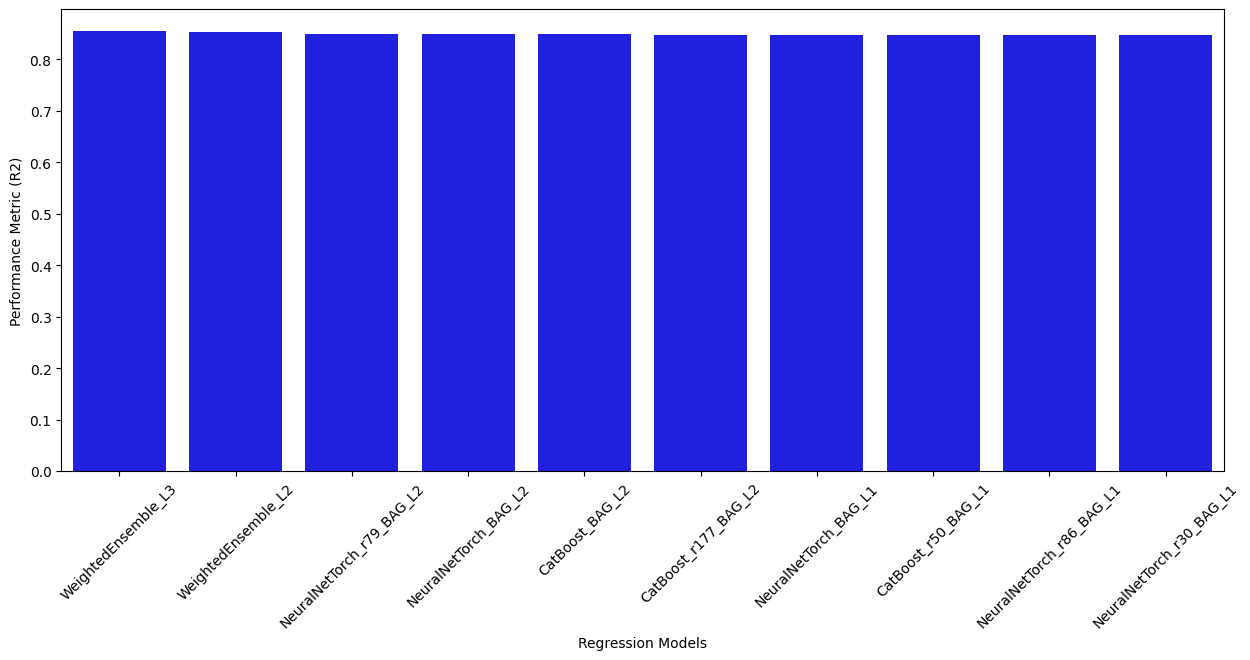

In [39]:
# Initialize the matplotlib figure - top 10 
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard().head(10), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

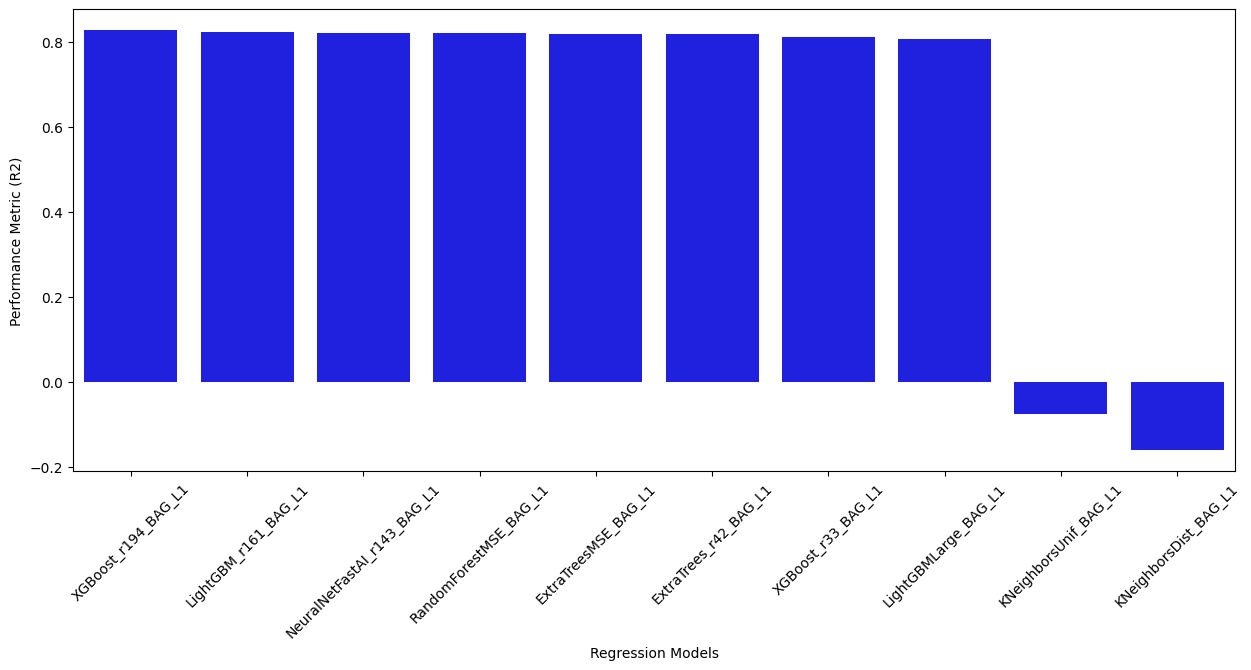

In [40]:
# Initialize the matplotlib figure - bottom 10
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard().tail(10), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [41]:
predictor.evaluate(X_test)

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

{'r2': 0.9065711346192035,
 'root_mean_squared_error': -3855.8179194361733,
 'mean_squared_error': -14867331.8278451,
 'mean_absolute_error': -2095.8408918467812,
 'pearsonr': 0.9522480913765508,
 'median_absolute_error': -1183.0473765624997}

In [42]:
# predictor_500.evaluate(X_test)

In [43]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

Predictions:   [11815.7236328125, 9617.3779296875, 45705.96875, 14418.3017578125, 10730.2294921875]


In [44]:
X_test

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
578,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,52,30.200,1,9724.53000
610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,47,29.370,1,8547.69130
569,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,48,40.565,2,45702.02235
1034,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,61,38.380,0,12950.07120
198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51,18.050,0,9644.25250
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,62,30.495,2,15019.76005
726,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41,28.405,1,6664.68595
1132,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,57,40.280,0,20709.02034
725,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,39.050,3,40932.42950


In [45]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

Text(0.5, 0, 'True Values')

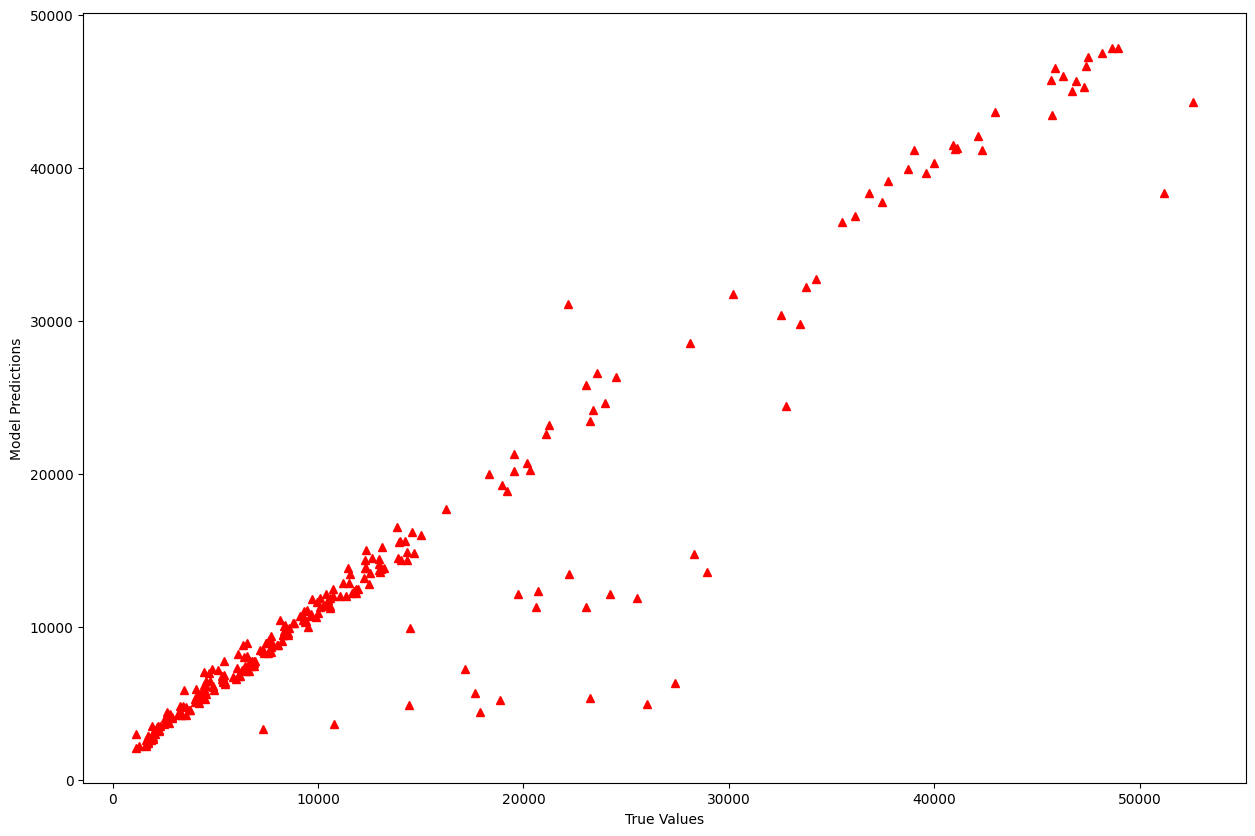

In [46]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 3855.818 
MSE = 14867331.8278451 
MAE = 2095.8408918467812 
R2 = 0.9065711346192035


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [ ]:
# predictor_rsme = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'root_mean_squared_error').fit(train_data = X_train, time_limit = 300, presets = "best_quality")


In [ ]:
predictor_rsme.leaderboard().head(10)
#score_val is in the same value as the target variable i.e. $dollars 
# example, model WeightedEnsemble_l3 is around $4496 dollars deviation away from the actual

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor_rsme.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])
# Predictions:   [12184.439453125, 9500.6357421875, 45846.9140625, 13858.79296875, 10508.2060546875]

In [ ]:
predictor_rsme.fit_summary()

In [ ]:
X_test.head()

In [ ]:
# Initialize the matplotlib figure - top 10 
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor_rsme.leaderboard().head(10), color = "r")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:** 
- **How many unique regions do we have in the insurance_df?**

In [ ]:
insurance_df['region'].unique()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

In [ ]:
# predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
# predictor.fit_summary()
# predictor.leaderboard()

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize = (15, 6))
# sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
# ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
# plt.xticks(rotation = 45);

# predictor.evaluate(X_test)

# FINAL CAPSTONE PROJECT 

- The objective of this project is to build, train, and test a classifier model to predict diabetes in patients using AutoGluon. This project can be effectively used by healthcare professionals to detect diabetes and understand key factors that contribute to the disease.
- Please complete the following tasks:
  - Load the “diabetes.csv” dataset
  - Perform basic Exploratory Data Analysis (EDA)
  - Using ‘best_quality’ preset and ‘accuracy’ metric, train classification models using AutoGluon to predict the “Outcome” column 
  - Evaluate trained models' performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix.


In [61]:
# Import Key Libaries and datsets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import models


In [50]:
diabetes_df = pd.read_csv('diabetes.csv')

### EDA

In [51]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
len(diabetes_df)

768

In [52]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

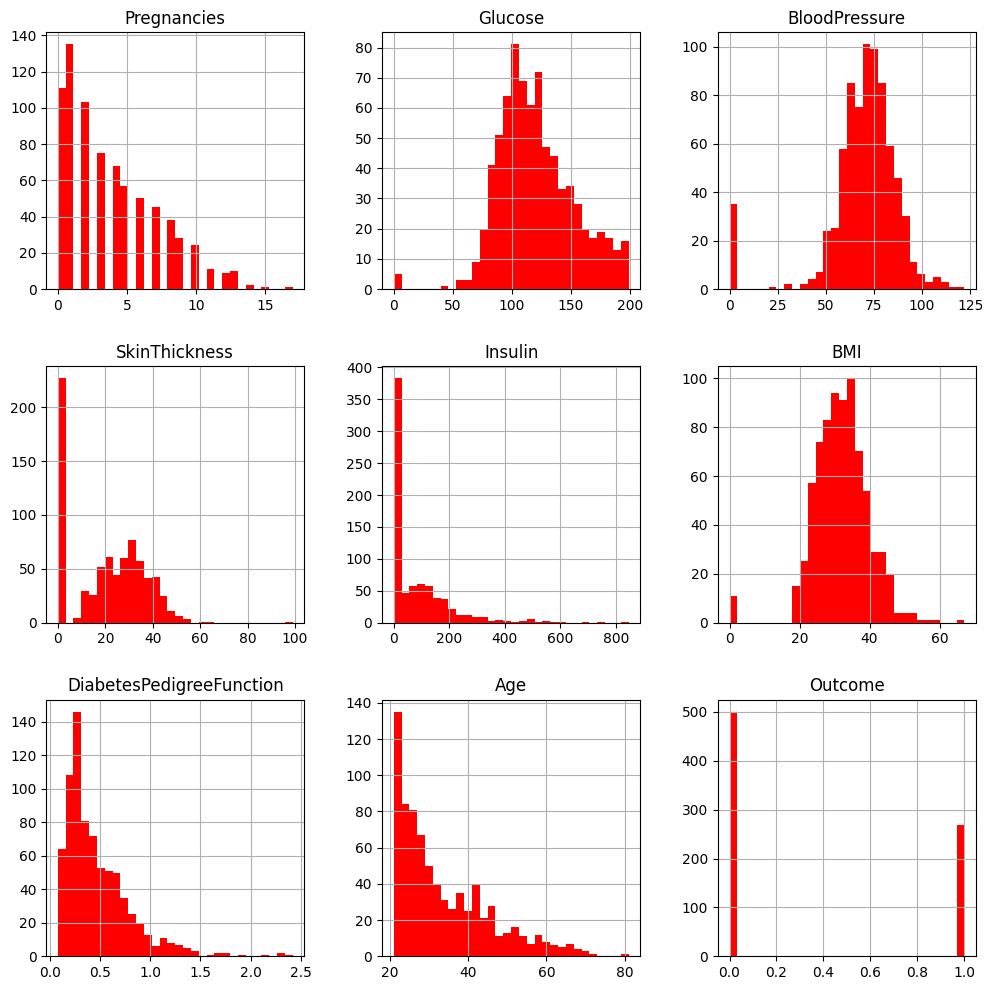

In [74]:
diabetes_df.hist(bins = 30, figsize = (12, 12), color = 'r');

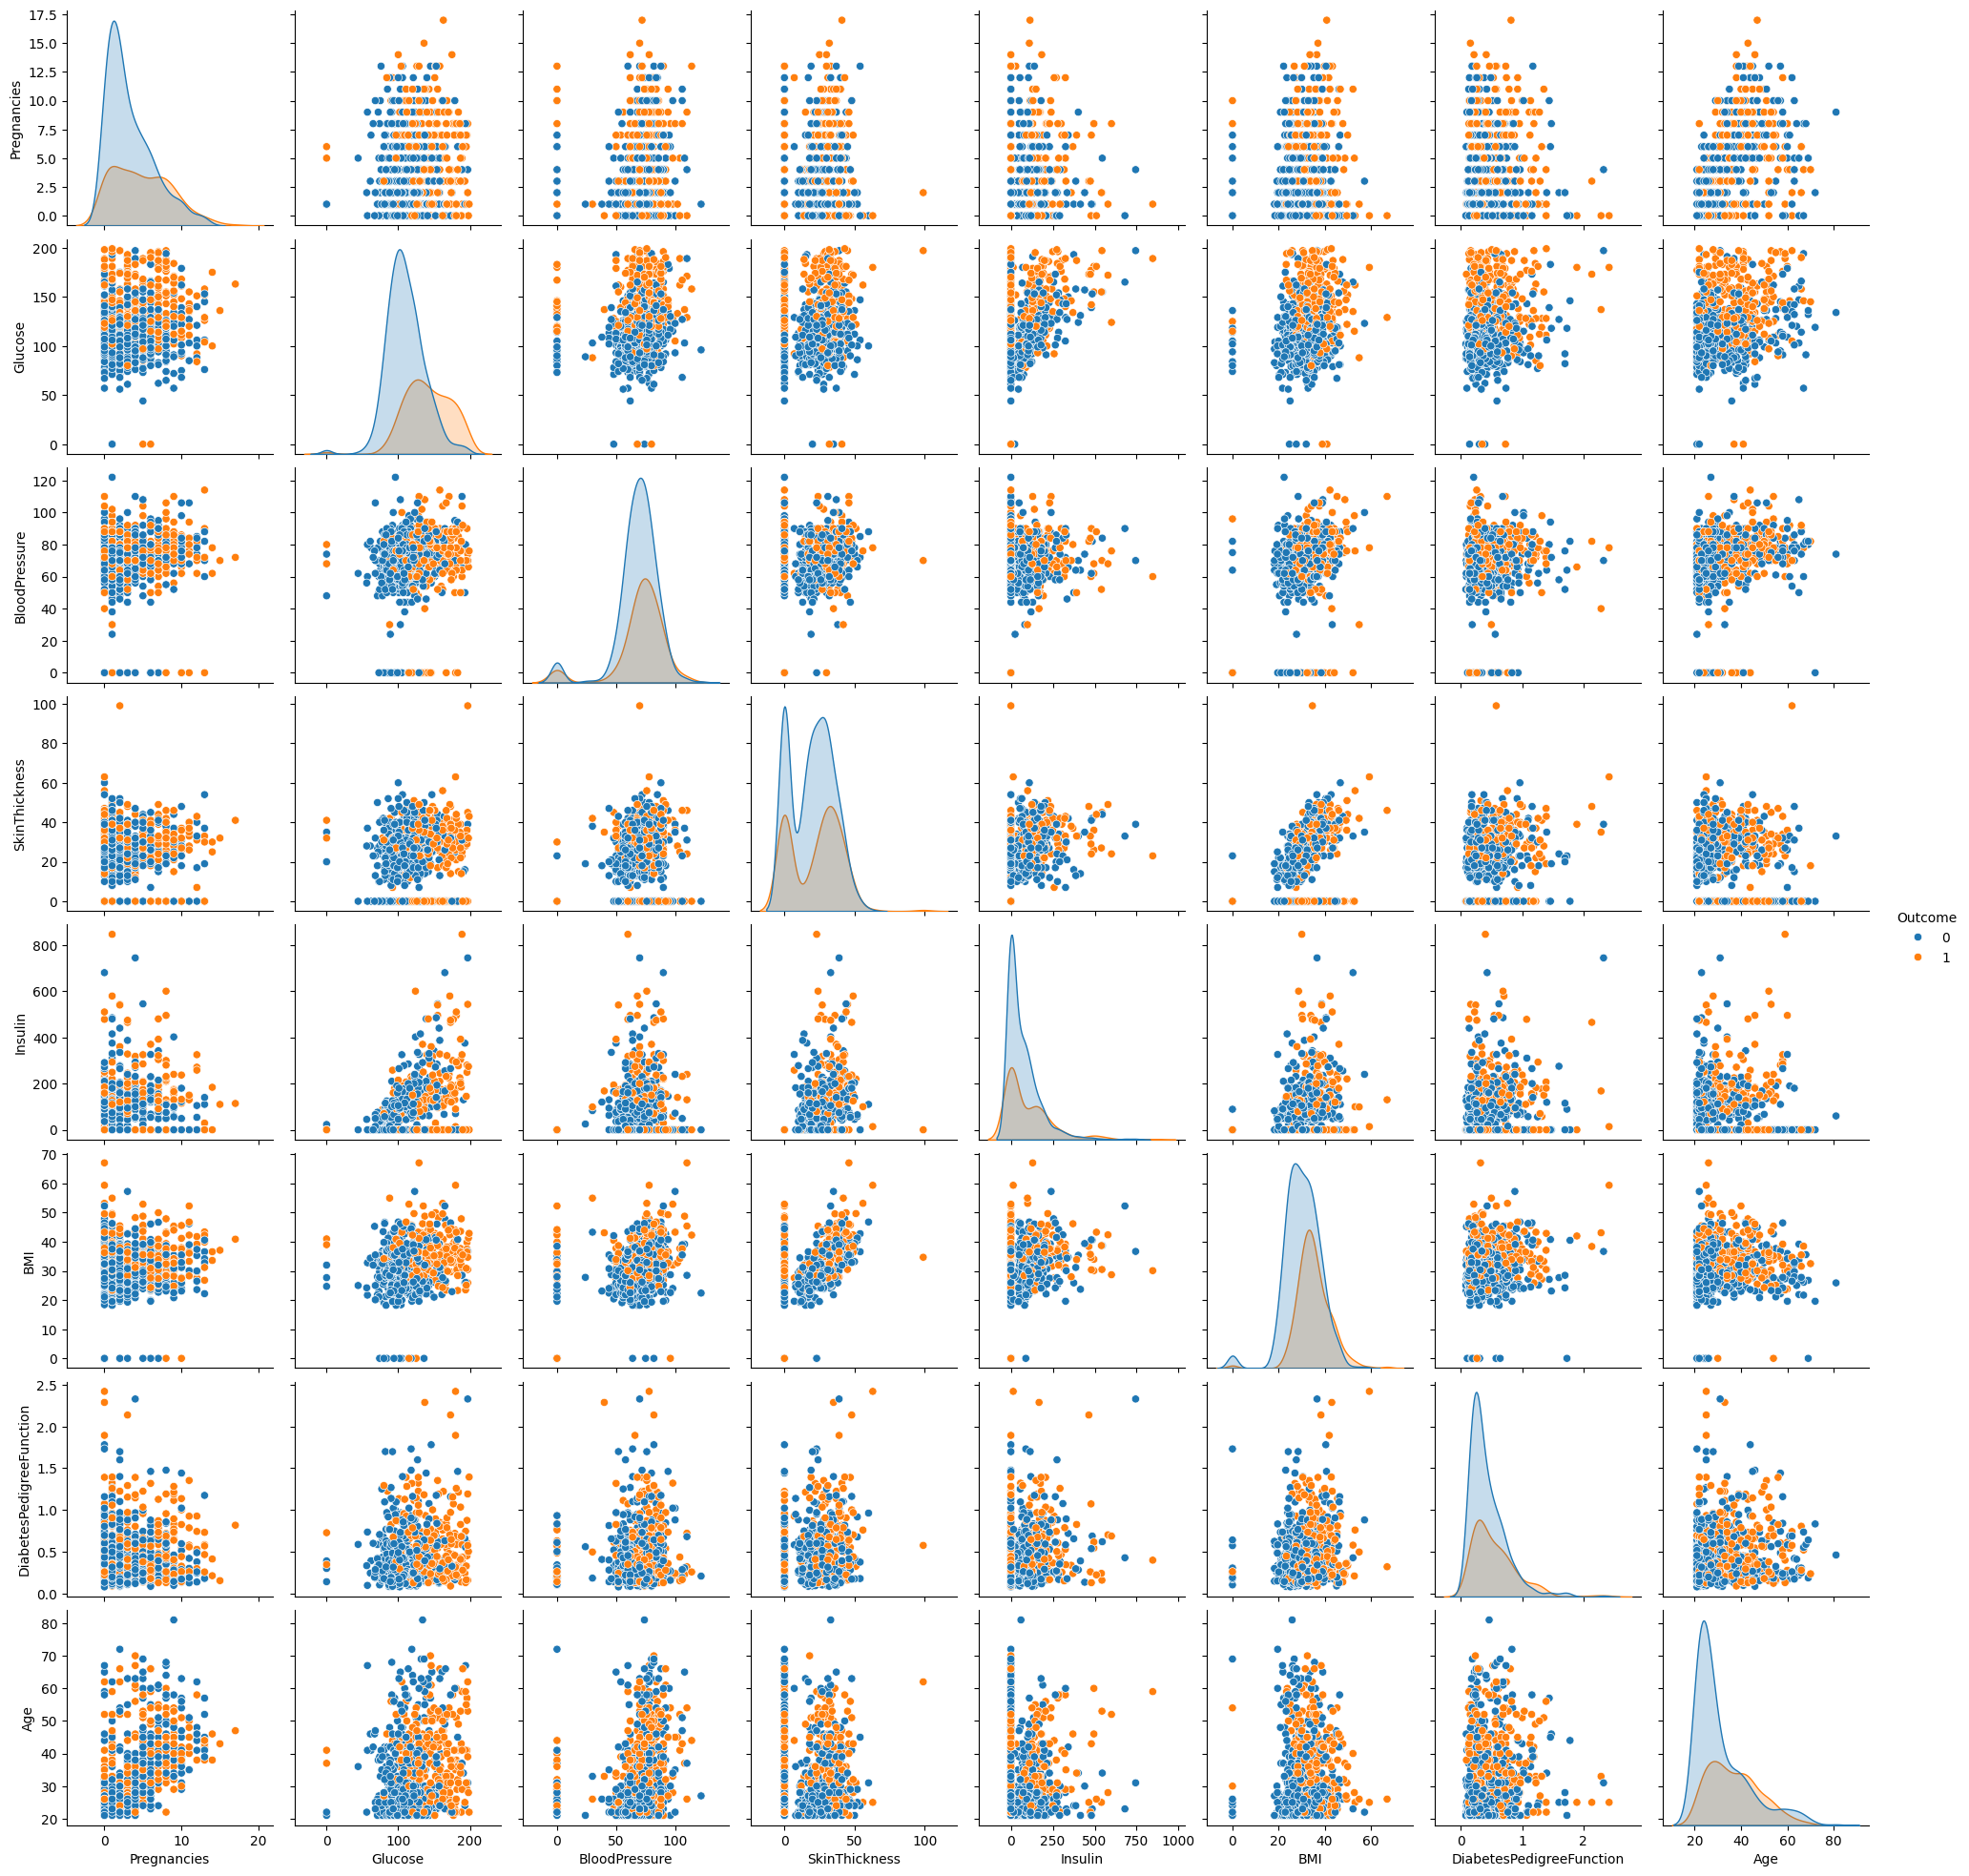

In [91]:
# plot pairplot - mapping variables againt the outcome, is there a pattern available? - if datapoints are ontop of one another, its hard to achieve a strong (95%) accuracy
sns.pairplot(diabetes_df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


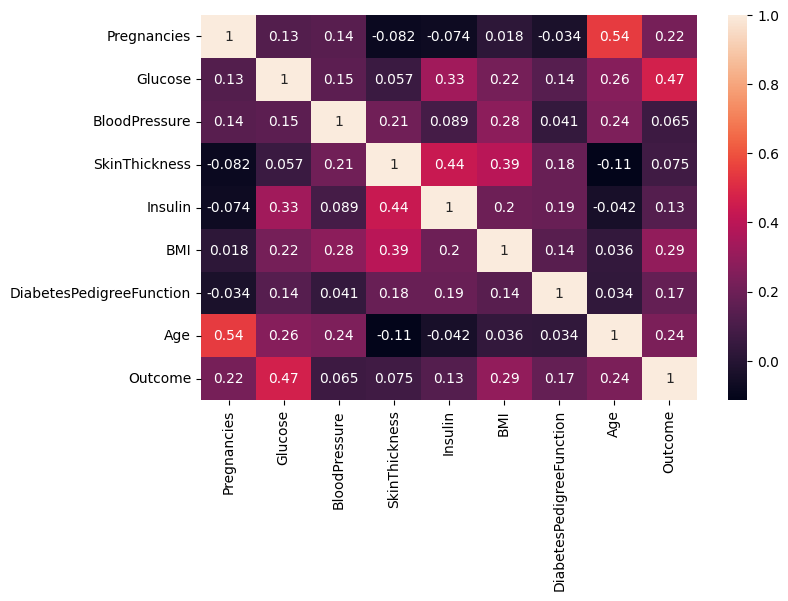

In [94]:
# plot heatmap correlation 
plt.figure(figsize = (8,5))
sns.heatmap(diabetes_df.corr(), annot = True);


<Axes: xlabel='Outcome', ylabel='count'>

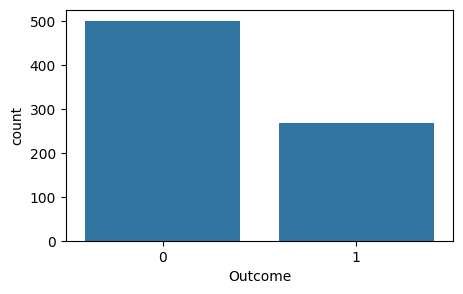

In [96]:
# plot the diabetes count
plt.figure(figsize = (5,3))
sns.countplot(x = 'Outcome', data = diabetes_df)

### Train Autogluon

In [57]:
# no OHE required - Straight to the split of data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(diabetes_df, test_size=0.2, random_state=0)

In [58]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,7,150,78,29,126,35.2,0.692,54,1
118,4,97,60,23,0,28.2,0.443,22,0
247,0,165,90,33,680,52.3,0.427,23,0
157,1,109,56,21,135,25.2,0.833,23,0
468,8,120,0,0,0,30.0,0.183,38,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [59]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29,1
482,4,85,58,22,49,27.8,0.306,28,0
230,4,142,86,0,0,44.0,0.645,22,1
527,3,116,74,15,105,26.3,0.107,24,0


In [62]:
# https://auto.gluon.ai/stable/api/autogluon.tabular.TabularPredictor.html
diabetes_predictor = TabularPredictor(label="Outcome", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 300, presets = "best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20250415_131311"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          14
Memory Avail:       9.33 GB / 24.00 GB (38.9%)
Disk Space Avail:   787.05 GB / 926.35 GB (85.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num

In [63]:
diabetes_predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.812704,accuracy,0.024343,2.928838,0.000208,0.020560,2,True,111
1,NeuralNetFastAI_r156_BAG_L1,0.811075,accuracy,0.021924,2.238159,0.021924,2.238159,1,True,43
2,NeuralNetFastAI_r4_BAG_L1,0.806189,accuracy,0.015000,1.568458,0.015000,1.568458,1,True,98
3,NeuralNetFastAI_r88_BAG_L1,0.802932,accuracy,0.022349,2.017432,0.022349,2.017432,1,True,68
4,NeuralNetFastAI_r143_BAG_L1,0.801303,accuracy,0.025230,2.599782,0.025230,2.599782,1,True,41
...,...,...,...,...,...,...,...,...,...,...
106,ExtraTreesEntr_BAG_L1,0.736156,accuracy,0.031657,0.184172,0.031657,0.184172,1,True,9
107,RandomForest_r15_BAG_L1,0.734528,accuracy,0.031824,0.282448,0.031824,0.282448,1,True,81
108,RandomForest_r127_BAG_L1,0.729642,accuracy,0.030708,0.278062,0.030708,0.278062,1,True,58
109,KNeighborsUnif_BAG_L1,0.700326,accuracy,0.015337,0.001682,0.015337,0.001682,1,True,1


### Evaulate Model

In [92]:
diabetes_predictor.evaluate(X_test)

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

{'accuracy': 0.8376623376623377,
 'balanced_accuracy': 0.7936965599522767,
 'mcc': 0.6073457777490395,
 'roc_auc': 0.8600119308013522,
 'f1': 0.7191011235955056,
 'precision': 0.7619047619047619,
 'recall': 0.6808510638297872}

In [104]:
accuracy = diabetes_predictor.evaluate(X_test)
print(f"Accuracy = {round(accuracy['accuracy'], 3)*100}%")

Accuracy = 83.8%


/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

In [93]:
diabetes_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L2   0.812704    accuracy       0.024343  2.928838                0.000208           0.020560            2       True        111
1    NeuralNetFastAI_r156_BAG_L1   0.811075    accuracy       0.021924  2.238159                0.021924           2.238159            1       True         43
2      NeuralNetFastAI_r4_BAG_L1   0.806189    accuracy       0.015000  1.568458                0.015000           1.568458            1       True         98
3     NeuralNetFastAI_r88_BAG_L1   0.802932    accuracy       0.022349  2.017432                0.022349           2.017432            1       True         68
4    NeuralNetFastAI_r143_BAG_L1   0.801303    accuracy       0.025230  2.599782                0.025230           2.599782            1       

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiT

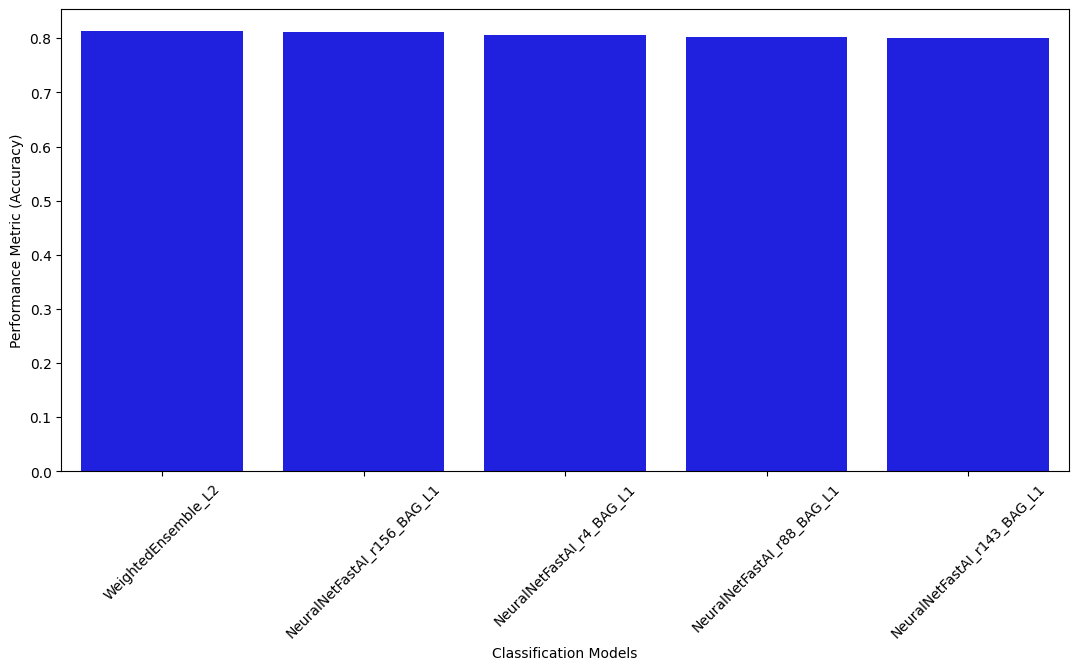

In [82]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (13, 6))
sns.barplot(x = "model", y = "score_val", data = diabetes_predictor.leaderboard()[:5], color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [83]:
diabetes_predictor.evaluate(X_test)

/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

{'accuracy': 0.8376623376623377,
 'balanced_accuracy': 0.7936965599522767,
 'mcc': 0.6073457777490395,
 'roc_auc': 0.8600119308013522,
 'f1': 0.7191011235955056,
 'precision': 0.7619047619047619,
 'recall': 0.6808510638297872}

In [84]:
y_pred = diabetes_predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:10])
print("Actuals:      ", list(X_test['Outcome'][:10]))

Predictions:   [1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
Actuals:       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0]


/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/christopherharris/Development/MachineLearning/OneWeekDS/.venv/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` 

In [85]:
y_test = X_test['Outcome']
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

<Axes: >

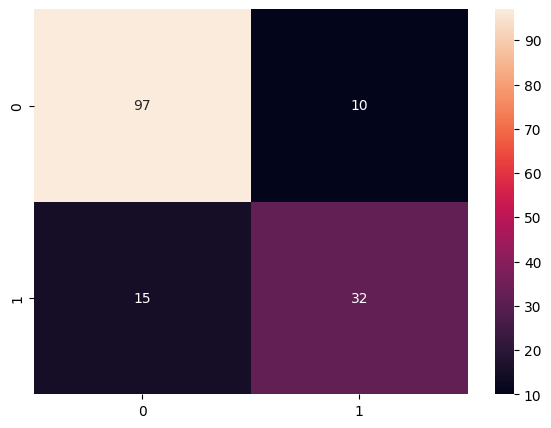

In [87]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
plt.figure(figsize = (7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# left to right : Top half 
# 97 true positives 
# 10 false positives 

# left to right : Bottom half 
# 15 false negatvies 
# 32 true negatives


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 
# 84% Accurate (CEIL) 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.76      0.68      0.72        47

    accuracy                           0.84       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154

